# Systems modeling of relationship between domain work, flow work, friction and total value

## Assumptions / Model

1. Constant funding
2. Funding flows into two kinds of work
    - Domain (Ideal): Work for externally & directly observable changes. Feature work, App development, Business logic etc...
    - Flow: Refactoring, pipeline optimization, etc...
3. Actual domain work done is less than ideal due to friction
4. Domain work translates to value
5. Flow work translates to some refactoring value
6. Friction is increased by domain work and also decreased by refactoring value

## Observations

- If you have no time for flow work, increase in total value slows down possibly to a halt
- A percentage of time for flow work can increase domain work and total value delivered with the same funding

## Remarks

Software work inevitably creates cruft and have impact on future changes. If you don't hold this view, this model is not very meaningful. You can ask teams on the ground or read something like https://www.industriallogic.com/blog/how-to-understand-refactoring/ and Mythical Man-Month.



In [13]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML, display_html
import pandas as pd
import matplotlib.pyplot as plt

Percentages are expressed in decimal

In [11]:


def model_refactoring(domain_developers_percentage, friction_from_domain_work_rate):
    args = pd.DataFrame([{
        "domain_developers_percentage": domain_developers_percentage,
        "friction_from_domain_work_rate": friction_from_domain_work_rate
    }])
    print(args.to_string(index=False))
    
    total_developers_count = 500
    domain_developers = int(domain_developers_percentage * total_developers_count)
    flow_developers = int(total_developers_count - domain_developers)
    rounds = 300

    spec = """

    # Constant funding
    [Funding] > Developers({total_developers_count}) @ {total_developers_count}
    
    # Funding flows into work
    ## Ideal domain work that is directly observable by users if there were no friction
    Developers > IdealDomainWork @ {domain_developers}
    ## Flow work includes refactoring, pipeline optimization
    Developers > FlowWork @ {flow_developers}

    # Actual domain work is less that ideal due to friction
    IdealDomainWork         > [Sink] @ Conversion(1)
    [calculateDomainWork]   > DomainWork @ (IdealDomainWork - Friction)
    
    # Domain work translates to value
    # 0.05 is an arbitrary number for line to fit in graph nicely
    DomainWork              > TotalValue @ Conversion(0.05)
    
    # FlowWork translates to refactoring value in some way
    FlowWork                > [Sink2] @ Conversion(1)
    Refactoring             > [Sink3] @ Conversion(1)
    [Refactor]              > Refactoring(0, Friction) @ FlowWork
    
    # Friction is increased by DomainWork and reduced by Refactoring
    [WorkFriction]          > Friction @ (DomainWork * {friction_from_domain_work_rate} - Refactoring)

    """.format(total_developers_count=total_developers_count, domain_developers=domain_developers, flow_developers=flow_developers, friction_from_domain_work_rate=friction_from_domain_work_rate)
    # print(spec)
    model = parse(spec)

    results = model.run(rounds=rounds)
    df = pd.DataFrame.from_records(results)

    result = df
    table = pd.concat([result.head(5), result.tail(5)])
    table = table[['IdealDomainWork', 'FlowWork', 'IdealDomainWork', 'DomainWork', 'Friction', 'TotalValue', 'Refactoring']]
    display_html(table)
    df[['IdealDomainWork', 'FlowWork', 'IdealDomainWork', 'DomainWork', 'TotalValue']].plot(figsize=(24, 4))
    plt.show()
    

 domain_developers_percentage  friction_from_domain_work_rate
                            1                            0.01


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,500,0,500,0.000000,0.000000,0,0
2,500,0,500,500.000000,0.000000,0,0
3,500,0,500,500.000000,5.000000,25,0
4,500,0,500,495.000000,10.000000,50,0
296,500,0,500,25.527574,474.730307,2227,0
297,500,0,500,25.269693,474.985583,2228,0
298,500,0,500,25.014417,475.238280,2229,0
299,500,0,500,24.761720,475.488424,2230,0
300,500,0,500,24.511576,475.736041,2231,0


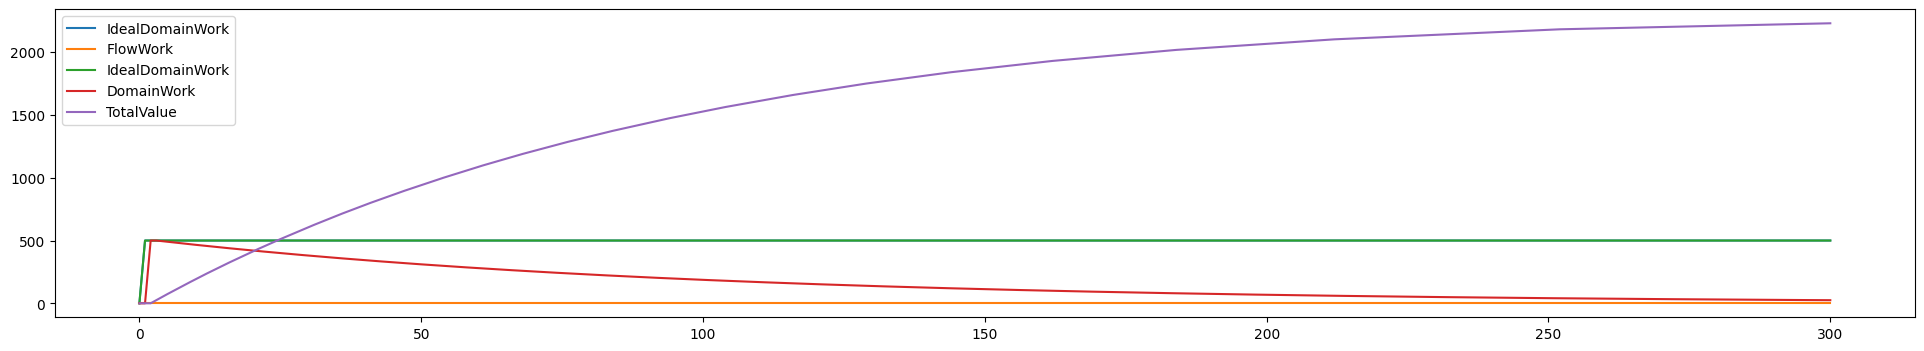

 domain_developers_percentage  friction_from_domain_work_rate
                            1                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.00000,0.000000,0,0
1,500,0,500,0.00000,0.000000,0,0
2,500,0,500,500.00000,0.000000,0,0
3,500,0,500,500.00000,10.000000,25,0
4,500,0,500,490.00000,20.000000,50,0
296,500,0,500,18.76882,530.409553,1145,0
297,500,0,500,18.76882,530.784929,1145,0
298,500,0,500,18.76882,531.160305,1145,0
299,500,0,500,18.76882,531.535682,1145,0
300,500,0,500,18.76882,531.911058,1145,0


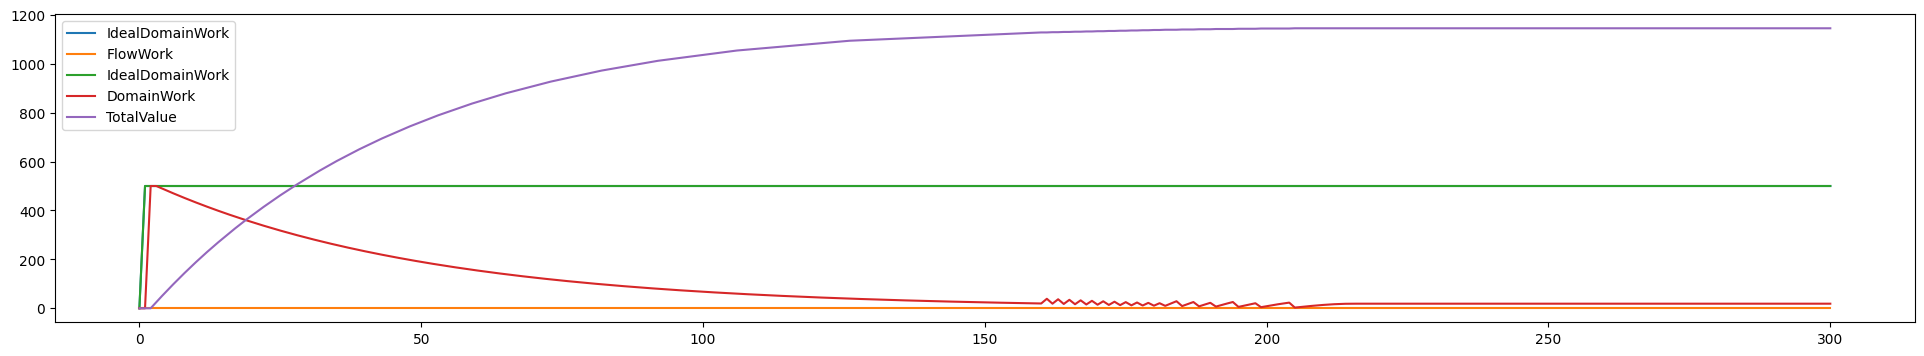

 domain_developers_percentage  friction_from_domain_work_rate
                         0.95                            0.05


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.00,0.00,0,0.00
1,475,25,475,0.00,0.00,0,0.00
2,475,25,475,475.00,0.00,0,0.00
3,475,25,475,475.00,23.75,23,0.00
4,475,25,475,451.25,47.50,46,23.75
296,475,25,475,427.50,47.50,6179,23.75
297,475,25,475,427.50,47.50,6200,23.75
298,475,25,475,427.50,47.50,6221,23.75
299,475,25,475,427.50,47.50,6242,23.75
300,475,25,475,427.50,47.50,6263,23.75


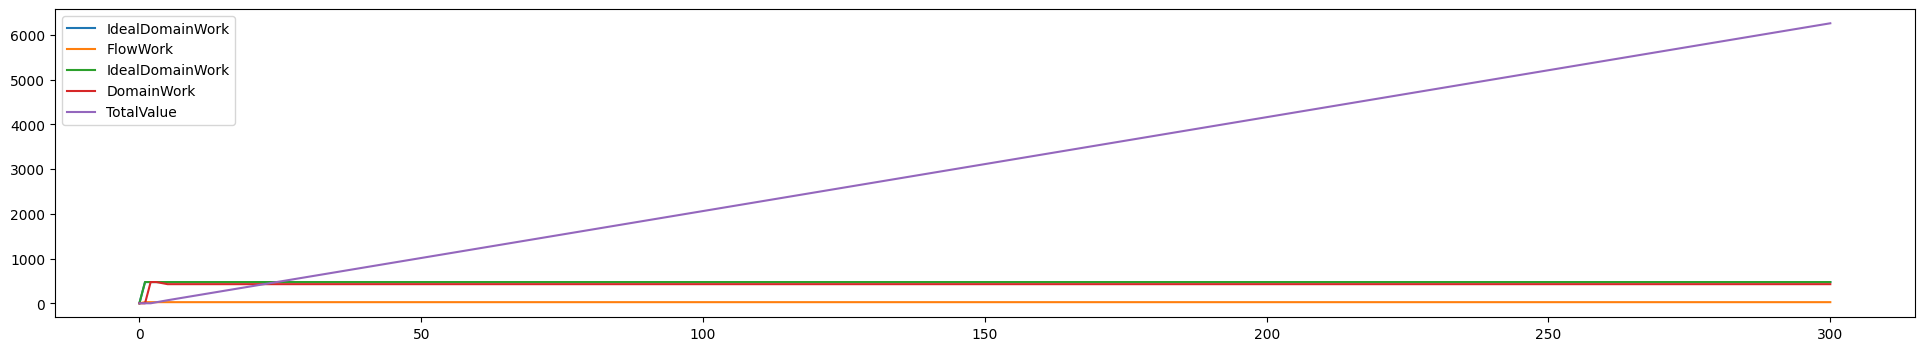

 domain_developers_percentage  friction_from_domain_work_rate
                          0.8                            0.05


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.0,0.0,0,0.0
1,400,100,400,0.0,0.0,0,0.0
2,400,100,400,400.0,0.0,0,0.0
3,400,100,400,400.0,20.0,20,0.0
4,400,100,400,380.0,40.0,40,20.0
296,400,100,400,360.0,40.0,5297,20.0
297,400,100,400,360.0,40.0,5315,20.0
298,400,100,400,360.0,40.0,5333,20.0
299,400,100,400,360.0,40.0,5351,20.0
300,400,100,400,360.0,40.0,5369,20.0


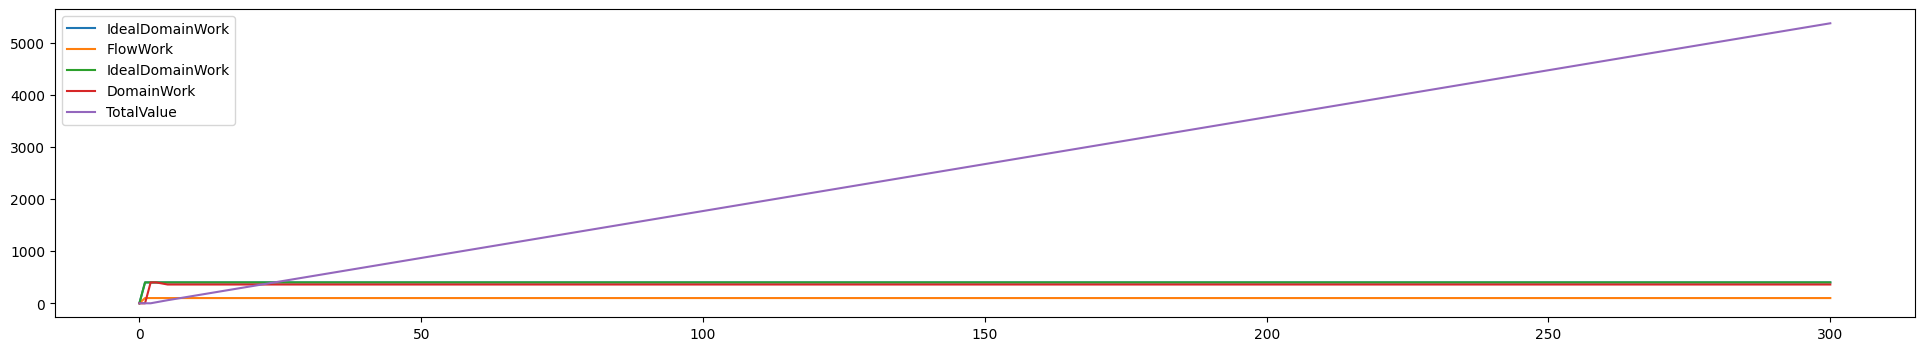

 domain_developers_percentage  friction_from_domain_work_rate
                          0.5                            0.05


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.0,0.0,0,0.0
1,250,250,250,0.0,0.0,0,0.0
2,250,250,250,250.0,0.0,0,0.0
3,250,250,250,250.0,12.5,12,0.0
4,250,250,250,237.5,25.0,24,12.5
296,250,250,250,225.0,25.0,3236,12.5
297,250,250,250,225.0,25.0,3247,12.5
298,250,250,250,225.0,25.0,3258,12.5
299,250,250,250,225.0,25.0,3269,12.5
300,250,250,250,225.0,25.0,3280,12.5


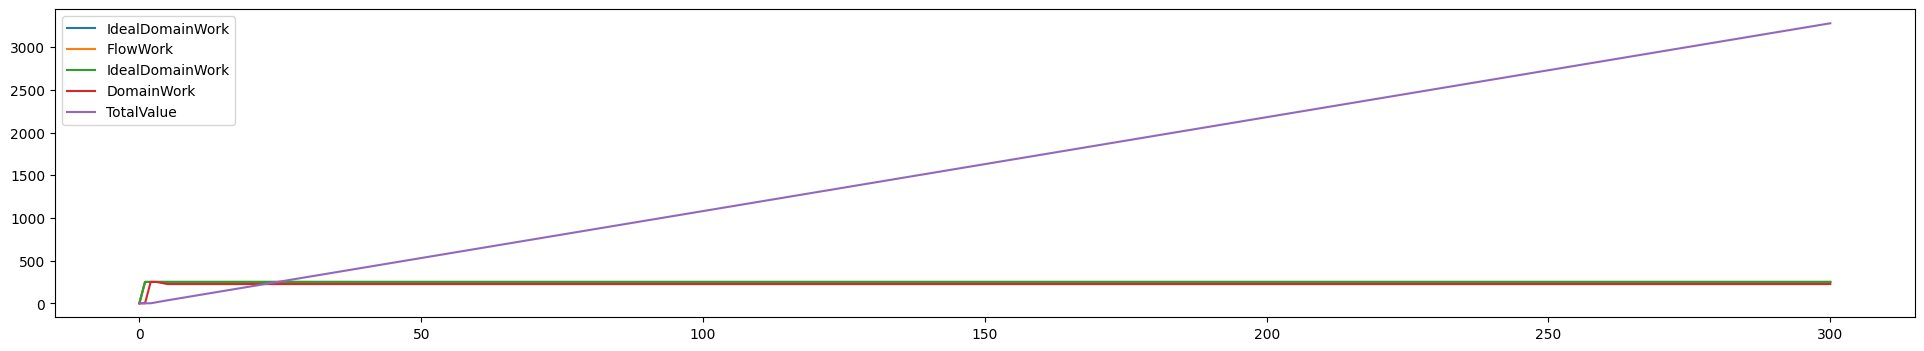

In [14]:
param_sets = [
    [[""],1 ,0.01], [1, 0.02], [0.95, 0.05], [0.8, 0.05], [0.5, 0.05]]
x = [model_refactoring(*param_set) for param_set in param_sets]

- 